In [1]:
library(ggplot2)
library(dplyr)
library(RColorBrewer)
library(tidyr)
library(readr)
library(stringr)
library(ggbeeswarm)
options(scipen = 999)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
p = ggplot() + 
    theme_light() + 
    theme(axis.text.x = element_text(angle = 90, hjust = 1),axis.title.x = element_blank(), axis.title.y = element_text(colour = "gray30", size = 9)) +
    theme(legend.direction = "horizontal", legend.position = "top", legend.title = element_blank(), legend.text = element_text(colour = "gray30", size = 9))

In [3]:
df = read.csv('overhead.csv')
df = df %>% mutate(Benchmark = sapply(strsplit(as.character(Benchmark), "/"), function(x) if(length(x) == 5) x[5] else x[4]))

In [4]:
df

Benchmark,ORG_Mean,Intra_Mean,ALP,Intra_pvalue,Inter_Mean,ILP,Inter_pvalue
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
correlation,11.760,11.836,0.994,0.000,11.761,1.000,0.964
covariance,12.159,12.173,0.999,0.222,12.149,1.001,0.396
gemm,10.131,13.799,0.734,0.000,10.119,1.001,0.475
gemver,9.502,10.266,0.926,0.000,9.553,0.995,0.427
gesummv,5.562,5.580,0.997,0.000,5.555,1.001,0.025
symm,96.901,96.047,1.009,0.000,96.913,1.000,0.891
syrk,57.135,54.707,1.044,0.000,57.135,1.000,1.000
trmm,91.703,90.461,1.014,0.000,91.779,0.999,0.623
2mm,11.197,11.320,0.989,0.000,11.198,1.000,0.891


In [5]:
ov = df %>% select(Benchmark, ALP, ILP) %>% gather("Speedup", "Values", 2:3)

In [6]:
df

Benchmark,ORG_Mean,Intra_Mean,ALP,Intra_pvalue,Inter_Mean,ILP,Inter_pvalue
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
correlation,11.760,11.836,0.994,0.000,11.761,1.000,0.964
covariance,12.159,12.173,0.999,0.222,12.149,1.001,0.396
gemm,10.131,13.799,0.734,0.000,10.119,1.001,0.475
gemver,9.502,10.266,0.926,0.000,9.553,0.995,0.427
gesummv,5.562,5.580,0.997,0.000,5.555,1.001,0.025
symm,96.901,96.047,1.009,0.000,96.913,1.000,0.891
syrk,57.135,54.707,1.044,0.000,57.135,1.000,1.000
trmm,91.703,90.461,1.014,0.000,91.779,0.999,0.623
2mm,11.197,11.320,0.989,0.000,11.198,1.000,0.891


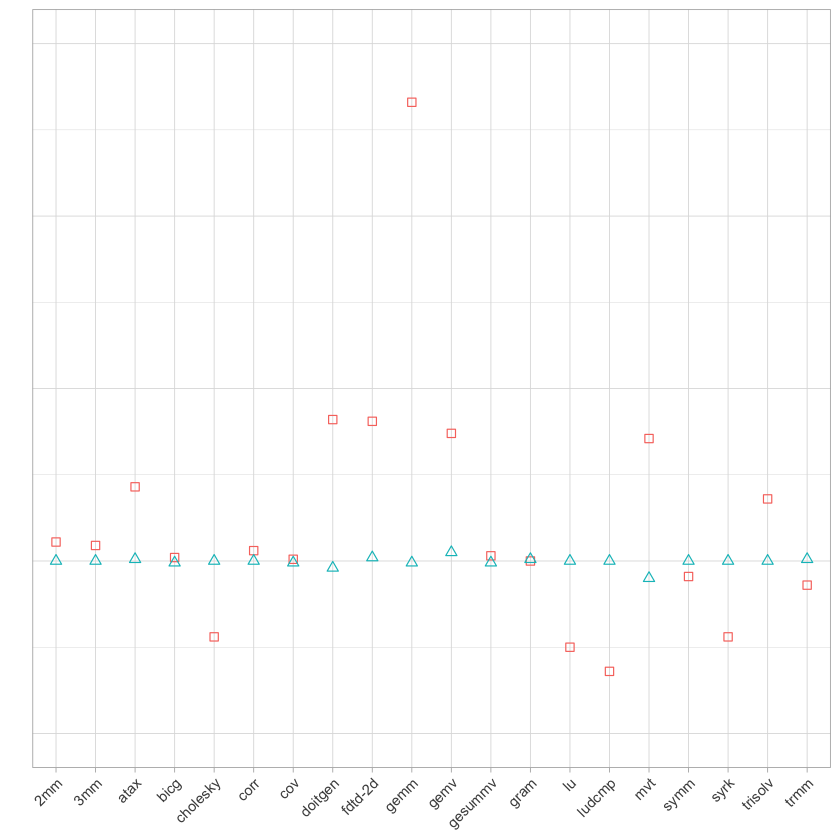

In [11]:
p + 
    geom_point(data = ov, aes(x = Benchmark, y = Values, fill = Speedup, shape = Speedup, colour = Speedup), size = 2) +
    ylab('') + xlab('') +
    scale_shape_manual(values = c(0, 2)) +
    scale_y_continuous(trans = "reverse", limits = c(1.1, 0.7)) +
    guides(colour = FALSE) +
#     ylim(1.1, 0.7) +
    theme(legend.position = "none") +
    theme(axis.text.x = element_text(angle = 45, vjust=1, hjust=1)) +
    theme(axis.text.y=element_blank(), axis.ticks.y = element_blank()) +
    scale_x_discrete(labels = c('2mm', '3mm', 'atax', 'bicg', 'cholesky', 'corr',
                                'cov', 'doitgen', 'fdtd-2d', 'gemm', 'gemv',
                                'gesummv', 'gram', 'lu', 'ludcmp', 'mvt', 'symm',
                                'syrk', 'trisolv', 'trmm')) +
    ggsave('rq3_overhead_big.pdf', device='pdf', width = 8, height = 3)
